PARTE 1 - BAIXAR E TREINAR OS DADOS

In [2]:
# Importar a base de dados
import pandas as pd 

df = pd.read_csv('dados/ENEM/microdados_enem_2022/DADOS/MICRODADOS_ENEM_2022.csv', sep=';', encoding='latin1')

In [3]:
# Ver se existe algum aluno de Oiapoque
total = (df["NO_MUNICIPIO_PROVA"] == "Chui").sum()
print(total)

0


*FILTROS*

In [4]:
# FILTRA PARA TER DADOS PRECISOS
# TIRA OS TREINEIROS
# TIRA QUEM NÃO FEZ AS DUAS PROVAS (ELIMINADO OU FALTOU) - NÚMEROS 0 E 2 
# TIRA QUE NÃO TEM A REDAÇÃO CORRIGIDA

# TIRA TREINEIRO (1 - Treineiro, 0 - Não Treineiro)
filtra_treineiros = df["IN_TREINEIRO"] == 0

# PEGAR PRESENÇA - PRECISA SER 1
# CIÊNCIA DAS NATUREZAS
filtra_CN = df["TP_PRESENCA_CN"] == 1
# CIÊNCIA HUMANAS
filtra_CH = df["TP_PRESENCA_CH"] == 1
# LINGUAGENS E CÓDIGOS
filtra_ling = df["TP_PRESENCA_LC"] == 1
# MATEMÁTICA
filtra_mat = df["TP_PRESENCA_MT"] == 1
# REDAÇÕES NÃO CORRIGIDAS (MELHOR TIRAR O STATUS IGUAL A 2 - ANULADA)
filtra_red = df["TP_STATUS_REDACAO"] != 2
# ESCOLARIDADE NÃO DEFINIDA
filtra_escolaridade_pai = df['Q001'] != 'H'

df = df[filtra_treineiros & filtra_CN & filtra_CH & filtra_ling & filtra_mat & filtra_red & filtra_escolaridade_pai]

df.head()


,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
7,210055778089,2022,6,F,1,2,1,1,0,1,...,B,A,A,C,A,A,E,A,A,B
9,210055461467,2022,4,F,1,3,1,1,1,1,...,A,A,A,B,A,A,B,A,A,B
11,210054972570,2022,2,F,1,1,1,2,0,3,...,A,A,A,B,A,A,C,A,A,B


*PEGA AS NOTAS POR MATÉRIA E GRUPO DE RENDA*

In [5]:

df_focado = pd.DataFrame()

# PEGA RENDA FAMILIAR
df_focado["RENDA"] = df["Q006"]
df_focado['ESCOLARIDADE'] = df['Q001']

# PEGAR NOTAS

# Nota de redação
df_focado["NOTA REDAÇÃO"] = df["NU_NOTA_REDACAO"]
# Nota de Ciências da Natureza
df_focado["NOTA CIENCIA DA NATUREZA"] = df["NU_NOTA_CN"]
# Nota de Ciências Humanas
df_focado["NOTA CIENCIAS HUMANAS"] = df["NU_NOTA_CH"]
# Nota de Linguagens e Códigos
df_focado["NOTA LINGUAGEM E CODIGOS"] = df["NU_NOTA_LC"]
# Nota de Matemática
df_focado["NOTA MATEMATICA"] = df["NU_NOTA_MT"]

media_total_redacao = df_focado["NOTA REDAÇÃO"].mean()
media_total_cn = df_focado["NOTA CIENCIA DA NATUREZA"].mean()
media_total_ch = df_focado["NOTA CIENCIAS HUMANAS"].mean()
media_total_lc = df_focado["NOTA LINGUAGEM E CODIGOS"].mean()
media_total_m = df_focado["NOTA MATEMATICA"].mean()

std_total_redacao = df_focado["NOTA REDAÇÃO"].std()
std_total_cn = df_focado["NOTA CIENCIA DA NATUREZA"].std()
std_total_ch = df_focado["NOTA CIENCIAS HUMANAS"].std()
std_total_lc = df_focado["NOTA LINGUAGEM E CODIGOS"].std()
std_total_m = df_focado["NOTA MATEMATICA"].std()

df_focado.head()

,RENDA,ESCOLARIDADE,NOTA REDAÇÃO,NOTA CIENCIA DA NATUREZA,NOTA CIENCIAS HUMANAS,NOTA LINGUAGEM E CODIGOS,NOTA MATEMATICA
2,B,E,760.0,421.1,546.0,498.8,565.3
3,A,C,320.0,490.7,388.6,357.8,416.0
7,B,E,440.0,398.1,427.3,400.2,404.9
9,B,E,360.0,467.5,461.0,466.7,435.3
11,B,E,940.0,458.7,539.8,488.2,456.8


*FAZ A MÉDIA DAS NOTAS POR GRUPO DE RENDAS*


In [6]:
df_rendas_notas = pd.DataFrame()
renda_categorias = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q"]

medias_por_categoria = {
    "RENDA": [],
    "MEDIA REDAÇÃO": [],
    "MEDIA CIENCIA DA NATUREZA": [],
    "MEDIA CIENCIAS HUMANAS": [],
    "MEDIA LINGUAGEM E CODIGOS": [],
    "MEDIA MATEMATICA": []}

for categoria_social in renda_categorias:

    df_renda = df_focado.loc[df_focado['RENDA'] == categoria_social]

    media_renda_a_redacao = df_renda["NOTA REDAÇÃO"].mean()
    media_renda_a_cnatureza = df_renda["NOTA CIENCIA DA NATUREZA"].mean()
    media_renda_a_chumanas = df_renda["NOTA CIENCIAS HUMANAS"].mean()
    media_renda_a_clinguagem = df_renda["NOTA LINGUAGEM E CODIGOS"].mean()
    media_renda_a_cmatematica = df_renda["NOTA MATEMATICA"].mean()

    medias_por_categoria["RENDA"].append(categoria_social)
    medias_por_categoria["MEDIA REDAÇÃO"].append(media_renda_a_redacao)
    medias_por_categoria["MEDIA CIENCIA DA NATUREZA"].append(media_renda_a_cnatureza)
    medias_por_categoria["MEDIA CIENCIAS HUMANAS"].append(media_renda_a_chumanas)
    medias_por_categoria["MEDIA LINGUAGEM E CODIGOS"].append(media_renda_a_clinguagem)
    medias_por_categoria["MEDIA MATEMATICA"].append(media_renda_a_cmatematica)

df_rendas_notas = pd.DataFrame(medias_por_categoria)

df_rendas_notas

,RENDA,MEDIA REDAÇÃO,MEDIA CIENCIA DA NATUREZA,MEDIA CIENCIAS HUMANAS,MEDIA LINGUAGEM E CODIGOS,MEDIA MATEMATICA
0,A,533.556199,461.594941,484.830032,469.676954,473.546044
1,B,571.487350,470.755763,499.471696,488.835777,493.364761
2,C,607.025417,485.568144,520.638744,512.690690,523.193426
3,D,627.850531,494.860124,531.615318,523.967078,540.172388
4,E,650.390020,504.708887,542.004459,533.640086,557.795504
5,F,669.954036,514.292155,551.715084,541.898979,575.530116
6,G,685.765434,521.491690,559.109648,548.411261,586.492735
7,H,708.968526,532.146552,569.325431,556.448711,603.486038
8,I,727.850569,542.347871,578.582649,563.791941,619.533674
9,J,739.929101,547.867490,584.037486,568.154354,629.069178


*GRAFICO DA MÉDIA DAS NOTAS POR RENDA FAMILIAR*

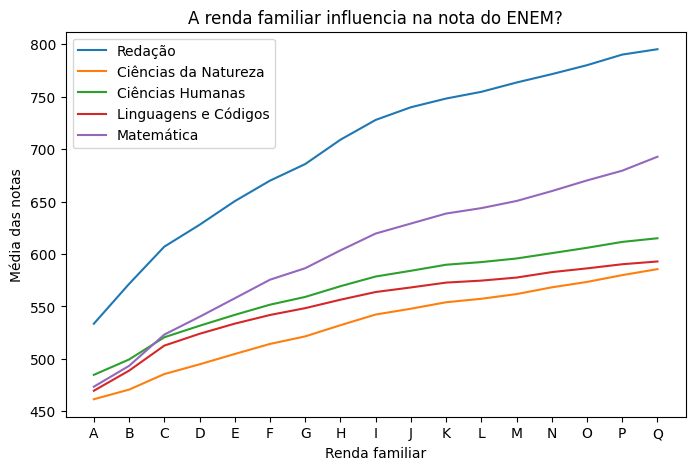

In [7]:
# Gerar grafico df_rendas_notas
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.title("A renda familiar influencia na nota do ENEM?")
plt.xlabel("Renda familiar")
plt.ylabel("Média das notas")
plt.plot(df_rendas_notas["RENDA"], df_rendas_notas["MEDIA REDAÇÃO"], label="Redação")
plt.plot(df_rendas_notas["RENDA"], df_rendas_notas["MEDIA CIENCIA DA NATUREZA"], label="Ciências da Natureza")
plt.plot(df_rendas_notas["RENDA"], df_rendas_notas["MEDIA CIENCIAS HUMANAS"], label="Ciências Humanas")
plt.plot(df_rendas_notas["RENDA"], df_rendas_notas["MEDIA LINGUAGEM E CODIGOS"], label="Linguagens e Códigos")  
plt.plot(df_rendas_notas["RENDA"], df_rendas_notas["MEDIA MATEMATICA"], label="Matemática")
plt.legend()
plt.savefig('grafico/renda_enem.png', format='png')
plt.show()

In [8]:
df_rendas_notas = pd.DataFrame()
renda_categorias = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q"]

medias_por_categoria = {
    "RENDA": [],
    "MEDIA REDAÇÃO": [],
    "MEDIA CIENCIA DA NATUREZA": [],
    "MEDIA CIENCIAS HUMANAS": [],
    "MEDIA LINGUAGEM E CODIGOS": [],
    "MEDIA MATEMATICA": []}

for categoria_social in renda_categorias:

    df_renda = df_focado.loc[df_focado['RENDA'] == categoria_social]

    media_renda_a_redacao = (df_renda["NOTA REDAÇÃO"].mean() - media_total_redacao) / std_total_redacao
    media_renda_a_cnatureza = (df_renda["NOTA CIENCIA DA NATUREZA"].mean() - media_total_cn) / std_total_cn
    media_renda_a_chumanas = (df_renda["NOTA CIENCIAS HUMANAS"].mean() - media_total_ch) / std_total_ch
    media_renda_a_clinguagem = (df_renda["NOTA LINGUAGEM E CODIGOS"].mean() - media_total_lc) / std_total_lc
    media_renda_a_cmatematica = (df_renda["NOTA MATEMATICA"].mean() - media_total_m) / std_total_m

    medias_por_categoria["RENDA"].append(categoria_social)
    medias_por_categoria["MEDIA REDAÇÃO"].append(media_renda_a_redacao)
    medias_por_categoria["MEDIA CIENCIA DA NATUREZA"].append(media_renda_a_cnatureza)
    medias_por_categoria["MEDIA CIENCIAS HUMANAS"].append(media_renda_a_chumanas)
    medias_por_categoria["MEDIA LINGUAGEM E CODIGOS"].append(media_renda_a_clinguagem)
    medias_por_categoria["MEDIA MATEMATICA"].append(media_renda_a_cmatematica)

df_rendas_notas = pd.DataFrame(medias_por_categoria)

df_rendas_notas

,RENDA,MEDIA REDAÇÃO,MEDIA CIENCIA DA NATUREZA,MEDIA CIENCIAS HUMANAS,MEDIA LINGUAGEM E CODIGOS,MEDIA MATEMATICA
0,A,-0.498284,-0.511615,-0.592183,-0.679714,-0.607752
1,B,-0.310038,-0.387664,-0.411431,-0.430268,-0.440349
2,C,-0.133668,-0.187246,-0.150121,-0.119679,-0.188396
3,D,-0.030317,-0.061521,-0.014615,0.027139,-0.044979
4,E,0.081543,0.071738,0.113640,0.153081,0.103878
5,F,0.178636,0.201404,0.233519,0.260611,0.253677
6,G,0.257106,0.298817,0.324805,0.345400,0.346275
7,H,0.372259,0.442983,0.450920,0.450047,0.489812
8,I,0.465968,0.581011,0.565201,0.545656,0.625361
9,J,0.525912,0.655694,0.632541,0.602454,0.705905


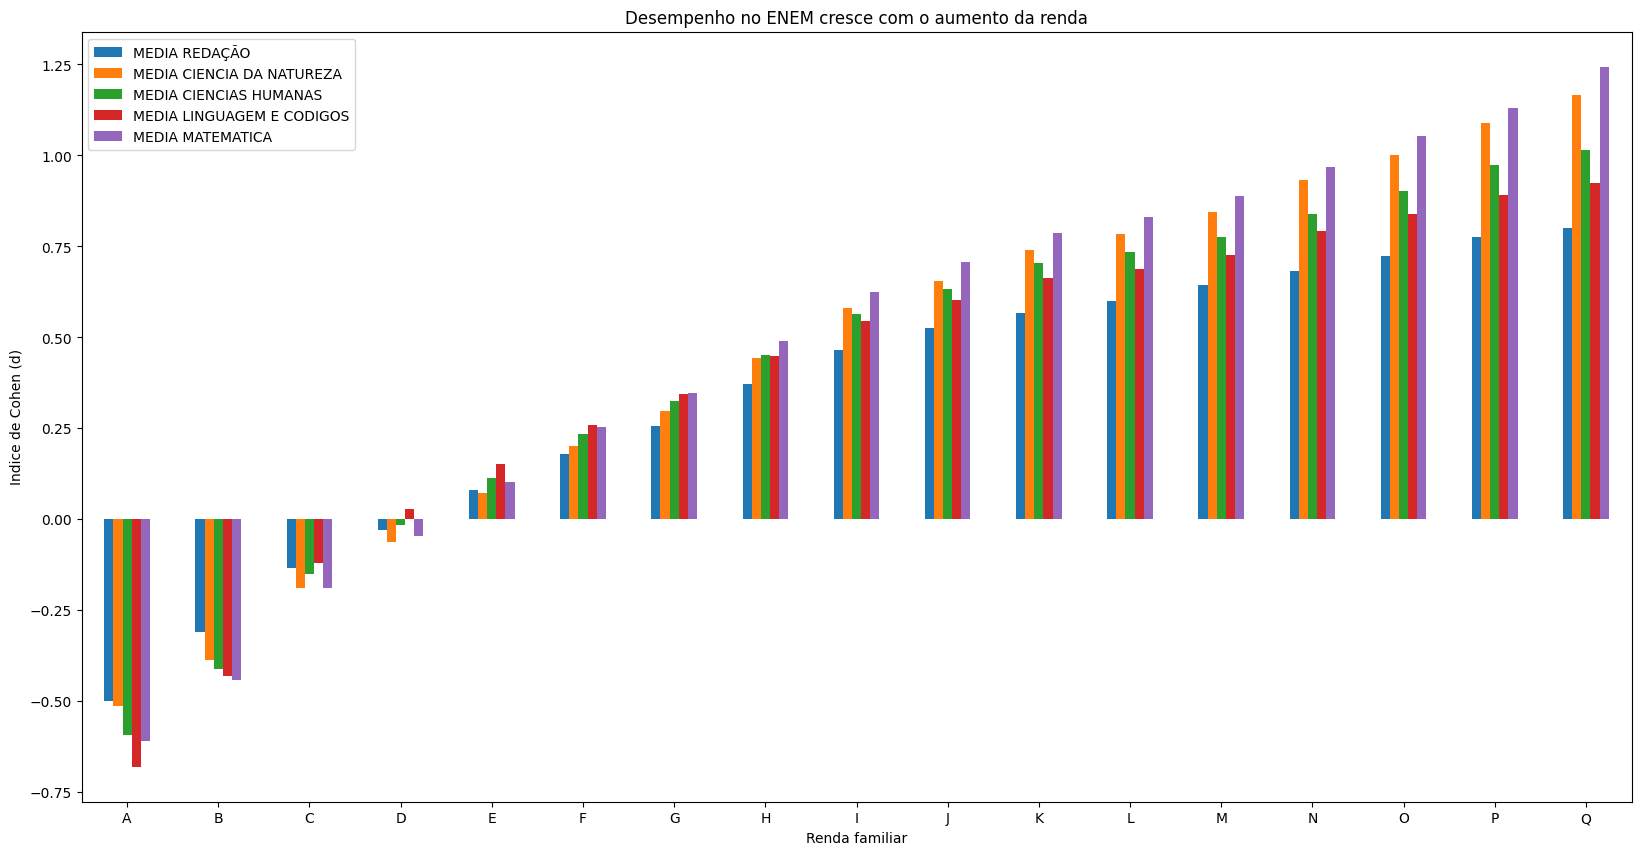

In [13]:
# Gerar grafico df_rendas_notas
import matplotlib.pyplot as plt

plt.style.use('default')
df_rendas_notas.plot.bar(x="RENDA", y=["MEDIA REDAÇÃO", "MEDIA CIENCIA DA NATUREZA", "MEDIA CIENCIAS HUMANAS", "MEDIA LINGUAGEM E CODIGOS", "MEDIA MATEMATICA"], figsize=(20,10))
plt.title("Desempenho no ENEM cresce com o aumento da renda")
plt.xlabel("Renda familiar")
plt.ylabel("Indice de Cohen (d)")
plt.xticks(rotation=0)
plt.savefig('grafico/dcohen.png', format='png')
plt.show()


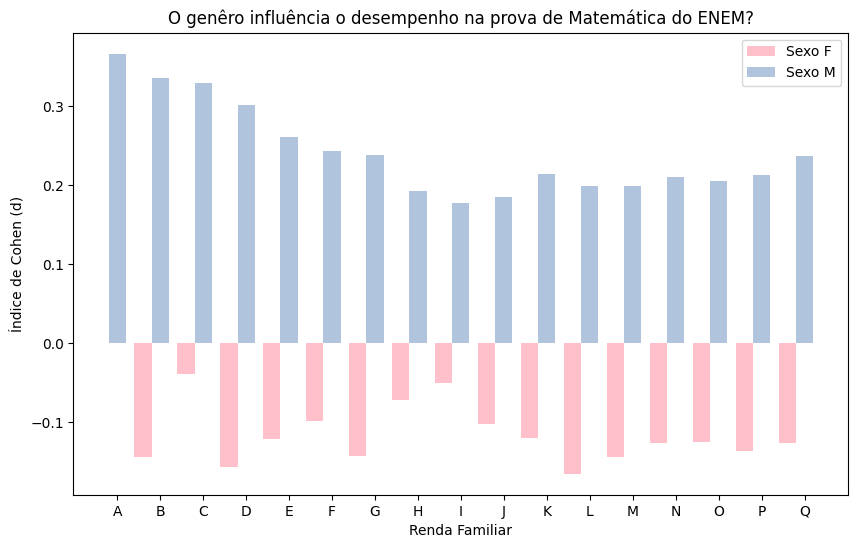

In [15]:
import numpy as np
df_compsexos = pd.DataFrame()

#Pega o sexo
df_compsexos['SEXO'] = df['TP_SEXO']
#Pega renda familiar 
df_compsexos["RENDA"] = df["Q006"]
#Pega nota de Matemática
df_compsexos["NOTA MATEMATICA"] = df["NU_NOTA_MT"]

#Agrupa de acordo com o sexo e renda
grouped = df_compsexos.groupby(['RENDA', 'SEXO']).agg({'NOTA MATEMATICA': ['mean', 'std']}).reset_index()
grouped.columns = ['RENDA', 'SEXO', 'mean', 'std']
grouped['d_cohen'] = (grouped['mean'] - grouped['mean'].shift()) / \
                     ((grouped['std'] + grouped['std'].shift()) / 2)


fig, ax = plt.subplots(figsize=(10, 6))

x_positions = range(len(grouped['RENDA'].unique()))
width = 0.4

colors = ['pink', 'lightsteelblue']  # Lista de cores correspondentes aos sexos

for i, sex in enumerate(grouped['SEXO'].unique()):
    d_cohen_values = grouped[grouped['SEXO'] == sex]['d_cohen']
    ax.bar(
        [pos + i * width for pos in x_positions],
        d_cohen_values,
        width=width,
        label=f'Sexo {sex}',
        color=colors[i]  
    )

ax.set_xticks([pos + width for pos in x_positions])
ax.set_xticklabels(grouped['RENDA'].unique())
ax.set_xlabel('Renda Familiar')
ax.set_ylabel('Índice de Cohen (d)')
ax.set_title('O genêro influência o desempenho na prova de Matemática do ENEM?')
ax.legend()
plt.savefig('grafico/desempenho_matematica.png', format='png')

plt.show()


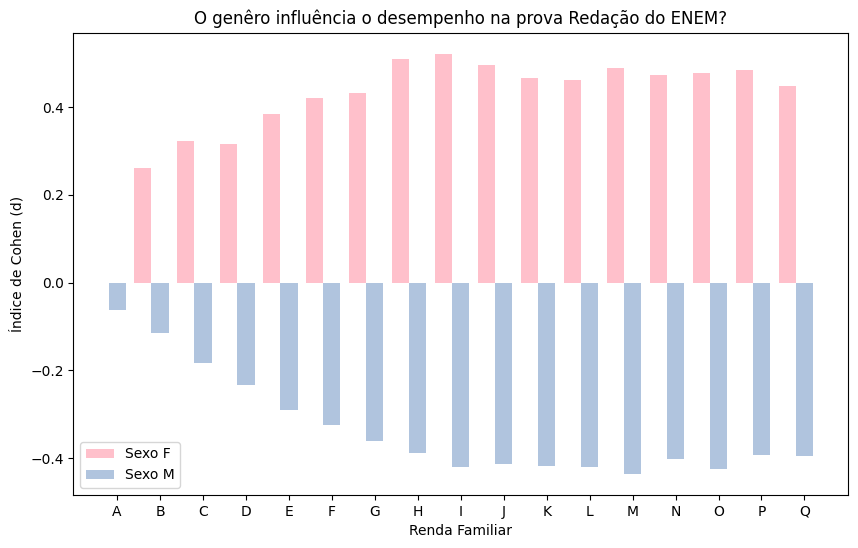

In [16]:
import numpy as np
df_compsexos = pd.DataFrame()

#Pega o sexo
df_compsexos['SEXO'] = df['TP_SEXO']
#Pega renda familiar 
df_compsexos["RENDA"] = df["Q006"]
#Pega nota de Matemática
df_compsexos["NOTA REDAÇÃO"] = df["NU_NOTA_REDACAO"]

#Agrupa de acordo com o sexo e renda
grouped = df_compsexos.groupby(['RENDA', 'SEXO']).agg({'NOTA REDAÇÃO': ['mean', 'std']}).reset_index()
grouped.columns = ['RENDA', 'SEXO', 'mean', 'std']
grouped['d_cohen'] = (grouped['mean'] - grouped['mean'].shift()) / \
                     ((grouped['std'] + grouped['std'].shift()) / 2)


# Criar o gráfico
fig, ax = plt.subplots(figsize=(10, 6))

x_positions = range(len(grouped['RENDA'].unique()))
width = 0.4

colors = ['pink', 'lightsteelblue']  # Lista de cores correspondentes aos sexos

for i, sex in enumerate(grouped['SEXO'].unique()):
    d_cohen_values = grouped[grouped['SEXO'] == sex]['d_cohen']
    ax.bar(
        [pos + i * width for pos in x_positions],
        d_cohen_values,
        width=width,
        label=f'Sexo {sex}',
        color=colors[i]  
    )

ax.set_xticks([pos + width for pos in x_positions])
ax.set_xticklabels(grouped['RENDA'].unique())
ax.set_xlabel('Renda Familiar')
ax.set_ylabel('Índice de Cohen (d)')
ax.set_title('O genêro influência o desempenho na prova Redação do ENEM?')
ax.legend()
plt.savefig('grafico/desempenho_redacao.png', format='png')
plt.show()
